In [1]:
"""
Author : Byunghyun Ban
Date : 2020.07.17.
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import random
import time
try:
    from matplotlib import pyplot as plt
except ModuleNotFoundError:
    import pip
    pip.main(['install', 'matplotlib'])
    try:
        from matplotlib import pyplot as plt
    except ModuleNotFoundError:
        time.sleep(2)
        from matplotlib import pyplot as plt

try:
    import numpy as np
except ModuleNotFoundError:
    import pip
    pip.main(['install', 'numpy'])
    try:
        import numpy as np
    except ModuleNotFoundError:
        time.sleep(2)
        import numpy as np

try:
    from PIL import Image

except ModuleNotFoundError:
    import pip
    pip.main(['install', 'pillow'])
    try:
        from PIL import Image
    except ModuleNotFoundError:
        time.sleep(2)
        from PIL import Image

# 데이터를 떠먹여 줄 클래스를 제작합니다.
class DataReader():
    def __init__(self):
        self.label = ["Rock", "Paper", "Scissors"]

        self.train_X = []
        self.train_Y = []
        self.test_X = []
        self.test_Y = []

        self.read_images()

    def read_images(self):
        data = []
        print("Reading Data...")
        classes = os.listdir("data")
        for i, cls in enumerate(classes):
            print("Opening " + cls + "/")
            for el in os.listdir("data/" + cls):
                img = Image.open("data/" + cls + "/" + el)
                data.append((np.asarray(img), i))
                img.close()

        random.shuffle(data)

        for i in range(len(data)):
            if i < 0.8*len(data):
                self.train_X.append(data[i][0])
                self.train_Y.append(data[i][1])
            else:
                self.test_X.append(data[i][0])
                self.test_Y.append(data[i][1])

        self.train_X = np.asarray(self.train_X) / 255.0
        self.train_Y = np.asarray(self.train_Y)
        self.test_X = np.asarray(self.test_X) / 255.0
        self.test_Y = np.asarray(self.test_Y)

        # 데이터 읽기가 완료되었습니다.
        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    def show_processed_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label[int(self.train_Y[i])])
        plt.show()


def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")


Reading Data...
Opening paper/
Opening rock/
Opening scissors/


Data Read Done!
Training X Size : (2314, 150, 150, 3)
Training Y Size : (2314,)
Test X Size : (578, 150, 150, 3)
Test Y Size : (578,)




************ TRAINING START ************ 
Epoch 1/10
73/73 [==============================] - 34s 418ms/step - loss: 0.7079 - accuracy: 0.6664 - val_loss: 0.2305 - val_accuracy: 0.9118
Epoch 2/10
73/73 [==============================] - 29s 399ms/step - loss: 0.0758 - accuracy: 0.9762 - val_loss: 0.0162 - val_accuracy: 0.9965
Epoch 3/10
73/73 [==============================] - 28s 381ms/step - loss: 0.0112 - accuracy: 0.9978 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/10
73/73 [==============================] - 29s 398ms/step - loss: 0.0245 - accuracy: 0.9914 - val_loss: 0.0126 - val_accuracy: 0.9983
Epoch 5/10
73/73 [==============================] - 34s 470ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 3.6474e-04 - val_accuracy: 1.0000
Epoch 6/10
73/73 [==================

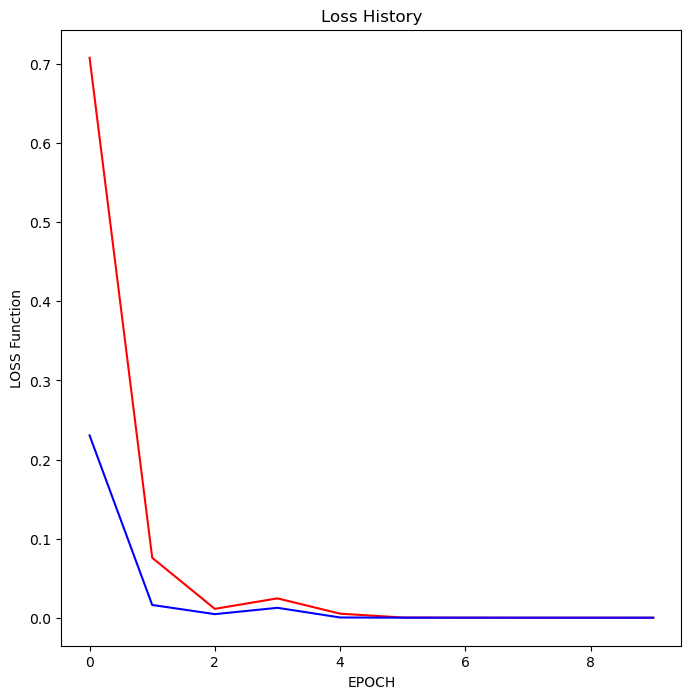

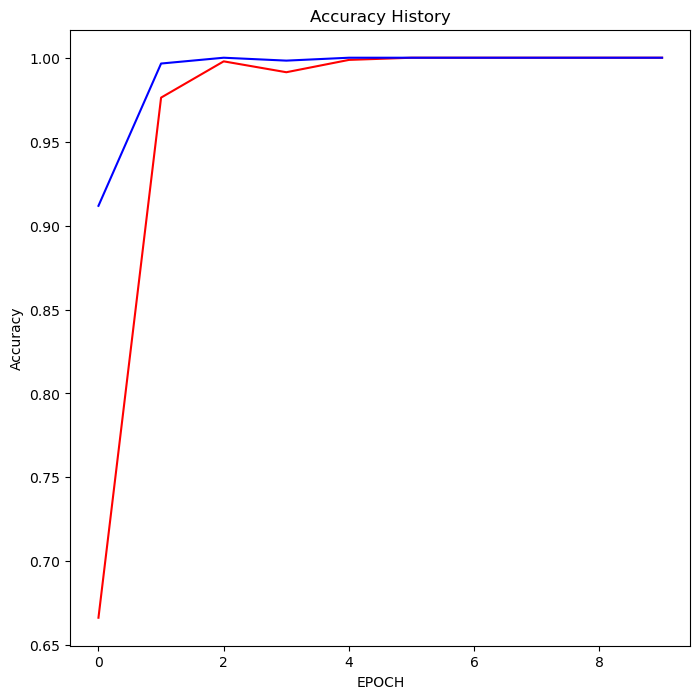

In [2]:
"""
Author : Byunghyun Ban
Date : 2020.07.24.
"""
from tensorflow import keras
import data_reader

# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 10  # 예제 기본값은 10입니다.

# 데이터를 읽어옵니다.
dr = data_reader.DataReader()

# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"), # 1
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # 2
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'), # 3
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'), # 4
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'), # 4
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation="softmax") # 가위바위보이기떄문에 출력갯수를 3개로 설정하였음
])


# 인공신경망을 컴파일합니다.
model.compile(optimizer='adam', 
              metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(history)
